In [2]:
import numpy as np
import math
from numpy.linalg import pinv
from copy import copy, deepcopy
import pylab as pl
import traceback
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs, minimize
import warnings
warnings.filterwarnings('ignore')

## 1. Implement Gradient Descent

#### 1.1 Implement a basic gradient descent procedure
The below optimize function is a generic implementation of the gradient descent. It takes the cost function and the gradient function as parameters and converges till the convergence criteria is met.


In [3]:
def optimize(costfunc, gradfunc, theta, X, y, alpha=0.05, convergence=0.0001, max_iteration=1000000, debug=False):
    ''' 
    @param costfunc(weight vector, feature matrix, result vector): callable: computes cost of the objective
    @param gradfunc(weight vector, feature matrix, result vector): callable: computes gradient of the objective
    @param: theta: vector: represents the initial guess of the weight vector that needs to be optimized
    @param: X: matrix: the feature matrix
    @param: y: vector: the output/result vector
    @param: alpha: non-neg real: the step count
    @param: convergence: non-neg real: the criteria on which the loop will end
    @param: max_iteration: int: hard stop for the number of iterations if the convergence criteria is not met
    @param: debug: bool: to test the method and plot graphs
    
    @return: theta: vector: the optimized value of the weight vector
    '''
    iterations = []
    costs = []
    cost = costfunc(theta, X, y)
    converged = False
    iteration = 0
    while True and iteration <= max_iteration:
        iteration += 1
        grad = gradfunc(theta, X, y)
        theta = theta - alpha*grad
        if np.isnan(theta).any():
            raise ValueError('Optimize function diverged.. ')
        new_cost = costfunc(theta, X, y)
        if abs(cost - new_cost) < convergence:
            break
        cost = new_cost
        iterations.append(iteration)
        costs.append(cost)
    if not debug:
        return theta
    else:
        return iterations, costs, theta

#### 1.2 Test Gradient function with: 
##### (a.) Convex function
For the convex function, we use a simple paraboloid with a global minimum at 0,0: $$ f = w1^2 + w2^2 $$

In [4]:
def cost_convex(theta, *args, **kwargs):
    '''
    @return: real: the value of the objective function
    '''
    return np.sum(theta**2)

def grad_convex(theta, *args, **kwargs):
    '''
    @return: real: the gradient of the objective function
    '''
    return np.sum(2*theta)

In [5]:
initial_theta = np.random.rand(2, 1)
optimize(cost_convex, grad_convex, initial_theta, None, None, alpha=0.23)

array([[ 0.07616832],
       [-0.07547926]])

##### Discuss the effect of the choice of starting guess, the step size, and the convergence criterion on the resulting solution.

**Initial guess:** 
My initial guess for the weight vector (theta) is a random generator. It does not matter what the initial guess is becuase the gradient descent will converge with any value of the initial guess. 


**Step size:**
As we can see from the graphs below, the step count (alpha) of ~0.2 converges fastest and the cost for that is also ~0.

**Convergence criteria:**
The convergence criteria is left as the default value of 0.0001

Parameter setting for convex function


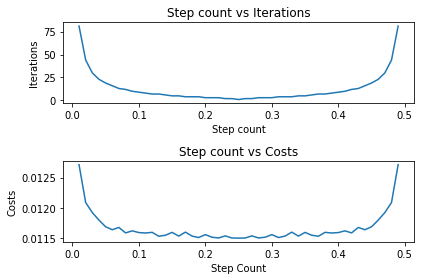

In [11]:
alpha_lst = list(np.arange(0.0, 0.6, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(cost_convex, grad_convex, initial_theta, None, None, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception:
        alpha_lst.remove(alpha)

print('Parameter setting for convex function')
        
ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax1 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count = 0.2')

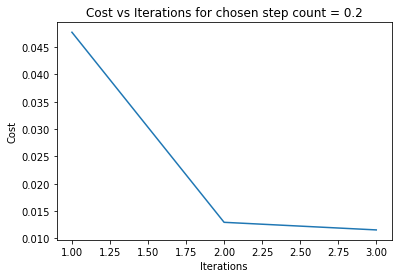

In [12]:
iters, cost, w = optimize(cost_convex, grad_convex, initial_theta, None, None, alpha=0.2, debug=True)
plt.plot(iters, cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count = 0.2')

##### (b.) non-convex function

For the Non-convex function, we use a sine function. 
Since sin does not have a global minimum, we may converge to any point that let's us reach the minimum value of the sin function (i.e. approx -1)

In [13]:
# Non-convex function: f = sin(x) ==> No global minima
def cost_non_convex(theta, *args, **kwargs):
    '''
    @return: real: the value of the objective function
    '''
    return math.sin(theta)

def grad_non_convex(theta, *args, **kwargs):
    '''
    @return: real: the gradient of the objective function
    '''
    return math.cos(theta)

In [14]:
initial_theta = math.radians(88) # close to local maxima as sin(90) = 1
w = optimize(cost_non_convex, grad_non_convex, initial_theta, None, None, alpha=1.25)
print('Optimal weight:', math.degrees(w), 'radians')
print('Sine value of the optimal weight:', math.sin(w), 'which is approx -1')

Optimal weight: -90.08527585977758 radians
Sine value of the optimal weight: -0.999998892415491 which is approx -1


We get a local minima of -90 degree radians whose sine value is quivalent to approx -1 (the local minimum value)

##### Discuss the effect of the choice of starting guess, the step size, and the convergence criterion on the resulting solution.

**Initial guess:** 
My initial guess for the weight vector (theta) is a random generator. It does not matter what the initial guess is becuase the gradient descent will converge with any value of the initial guess. 


**Step size:**
As we can see from the graphs below, the step count (alpha) of ~1.25 converges fastest and the cost for that is also approx 0.

**Convergence criteria:**
The convergence criteria is left as the default value of 0.0001

Parameter setting for non-convex function


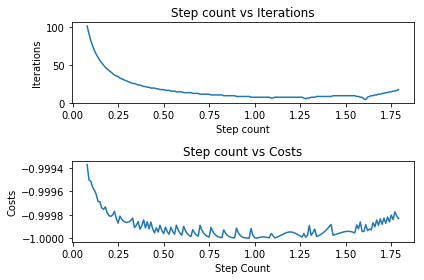

In [15]:
initial_theta = math.radians(88) # close to local maxima as sin(90) = 1
alpha_lst = list(np.arange(0.0, 1.8, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(cost_non_convex, grad_non_convex, initial_theta, None, None, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception as e:
        alpha_lst.remove(alpha)

print('Parameter setting for non-convex function')

ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
# plt.yscale('log')
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count = 1.25')

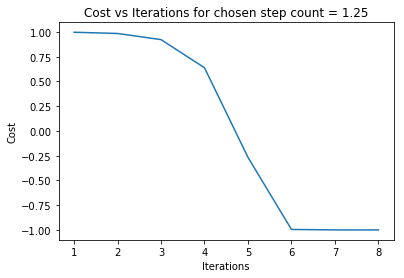

In [16]:
iters, cost, w = optimize(cost_non_convex, grad_non_convex, initial_theta, None, None, alpha=1.25, debug=True)
plt.plot(iters, cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count = 1.25')

#### 1.3 Write code to approximate the gradient of a function numerically at a given point using central differences

In [17]:
def approx_grad(costfunc, theta, X, y, h=0.001):
    '''
    @param costfunc(weight vector, feature matrix, result vector): callable: computes cost of the objective
    @param: theta: vector: represents the initial guess of the weight vector that needs to be optimized
    @param: X: matrix: the feature matrix
    @param: y: vector: the output/result vector
    @param: h: real: the difference parameter for the formula
    '''
    grad = np.zeros((theta.shape[0], 1))
    for i in range(len(theta)):
        sub_h_theta = copy(theta)
        sub_h_theta[i] -= h
        add_h_theta = copy(theta)
        add_h_theta[i] += h
        grad[i] = (costfunc(add_h_theta, X, y)-costfunc(sub_h_theta, X, y)) / (2*h)
    return grad

##### Verify its behavior on the functions you used in the question above by comparing the analytic and numerical gradients at various points.

In [32]:
'''
Note: This code depends on code from problem 2; 
so if you want to run it, you need to run the problem code before running this
'''
order = 3
X, y = bishopCurveData()
phi = designMatrix(X, order)
tmp_theta = np.random.rand(phi.shape[1], 1)
test_1 = sse_grad(tmp_theta, phi, y)
test_2 = approx_grad(sse, tmp_theta, phi, y)

print('test 1\n', test_1)
print('test 2\n', test_2)

test 1
 [[ 21.28878047]
 [ 16.57283738]
 [ 13.50778302]
 [ 11.36548174]]
test 2
 [[ 21.28878047]
 [ 16.57283738]
 [ 13.50778302]
 [ 11.36548174]]


**Comparison results of computing using finite difference method**
- test_1: computed using the formula of the gradient on a random vector of weights
- test_2: computed using the finite difference method on the random vector of weights (same as in test_1)

As we can see above, test_1 and test_2 match

#### 1.4 Compare the behavior of your gradient descent procedure with one the more sophisticated optimizers

In [33]:
initial_theta = math.radians(88)
iters = 0
def _non_convex_cst(*args, **kwargs):  # workaround to compute no. of iterations
    global iters
    iters += 1
    return cost_non_convex(*args, **kwargs)
    
w1 = optimize(_non_convex_cst, grad_non_convex, initial_theta, None, None, alpha=1.25)
i1 = iters
iters = 0
w2 = minimize(_non_convex_cst, initial_theta).x[0]
i2 = iters
iters = 0
print('\nTest for Non-convex function:')
print('-'*10)
print('Minimized value of my implementation of optimize method: ', math.sin(w1), 'with', i1, 'iterations')
print('Minimized value of a sophisticated optimizer:        ', math.sin(w2), 'with', i2, 'iterations')


initial_theta = np.random.rand(2, 1)
def _convex_cst(*args, **kwargs):  # workaround to compute no. of iterations
    global iters
    iters += 1
    return cost_convex(*args, **kwargs)

iters = 0
w1 = optimize(_convex_cst, grad_convex, initial_theta, None, None, alpha=0.23)
i1 = iters
iters = 0
w2 = minimize(_convex_cst, initial_theta).x
i2 = iters
iters = 0

print()
print('Test for Convex function:')
print('-'*10)
print('Minimized value of my implementation of optimize method: ', w1.flatten(), 'with', i1, 'iterations')
print('Minimized value of a sophisticated optimizer:', w2, 'with', i2, 'iterations')


Test for Non-convex function:
----------
Minimized value of my implementation of optimize method:  -0.999998892415491 with 10 iterations
Minimized value of a sophisticated optimizer:         -0.9999999999985059 with 30 iterations

Test for Convex function:
----------
Minimized value of my implementation of optimize method:  [-0.06350405  0.06389738] with 4 iterations
Minimized value of a sophisticated optimizer: [ -7.28022612e-09  -5.81896942e-09] with 16 iterations


## 2. Linear Basis Function Regression
#### Util methods

In [34]:
def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def bishopCurveData():
    # y = sin(2 pi x) + N(0,0.3),
    return getData('curvefitting.txt')

def regressAData():
    return getData('regressA_train.txt')

def regressBData():
    return getData('regressB_train.txt')

def validateData():
    return getData('regress_validate.txt')

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order):
    pl.plot(X.T.tolist()[0],Y.T.tolist()[0], 'gs')

    # You will need to write the designMatrix and regressionFit function

    # constuct the design matrix, the 0th column is just 1s.
    phi = designMatrix(X, order)
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print('w', w)

    # produce a plot of the values of the function 
    pts = np.array([[p] for p in pl.linspace(min(X), max(X), 100)])
    Yp = pl.dot(w.T, designMatrix(pts, order).T)
    pl.plot(pts, Yp.tolist()[0])
    
def plot_data(w, X, phi, y, order):
    pl.plot(X.T.tolist()[0],y.T.tolist()[0], 'gs')
    pts = np.array([[p] for p in pl.linspace(min(X), max(X), 100)])
    Yp = pl.dot(w.T, designMatrix(pts, order).T)
    pl.plot(pts, Yp.tolist()[0])

#### 2.1 Write a procedure for computing the maximum likelihood weight vector

In [24]:
def lin_normal_eq(X, y):
    return pinv(X.T.dot(X)).dot(X.T).dot(y)  # (mxm) * mxn * nx1

def designMatrix(X, order):
    if type(X) is list:
        X = np.array(X)
    phi = np.zeros(shape=(len(X), order+1))
    for col in range(phi.shape[1]):
        phi[:,col] = [X[i]**col for i in range(len(X))]
    return phi

def regressionFit(X, y, phi):
    return lin_normal_eq(phi, y)

#### Test your solution by replicating the plots in the Appendix Figure 1 and the weight values in Table 2. You should be able to get very close agreement.

** Order = 0 **

w [[ 0.1862995]]


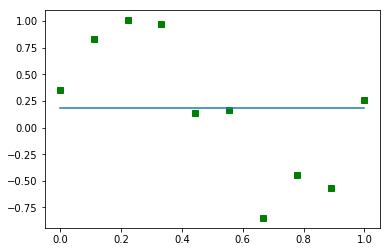

In [25]:
X, y = bishopCurveData()
regressionPlot(X, y, 0)

** Order = 1 **

w [[ 0.82021246]
 [-1.26782593]]


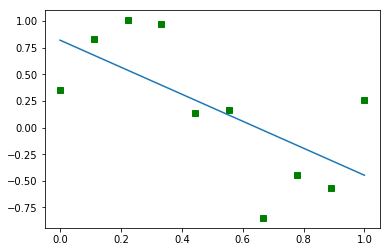

In [26]:
regressionPlot(X, y, 1)

** Order = 3 **

w [[  0.31370273]
 [  7.98537103]
 [-25.42610224]
 [ 17.37407653]]


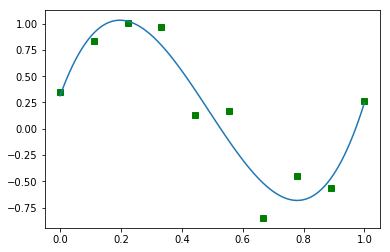

In [27]:
regressionPlot(X, y, 3)

** Order = 9 **

w [[  3.49489438e-01]
 [  2.32124232e+02]
 [ -5.31621068e+03]
 [  4.85179220e+04]
 [ -2.31403541e+05]
 [  6.39402425e+05]
 [ -1.06075647e+06]
 [  1.04139065e+06]
 [ -5.57150342e+05]
 [  1.25083352e+05]]


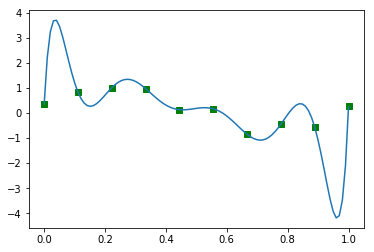

In [28]:
regressionPlot(X, y, 9)

#### 1.2 Now, write functions to compute the sum of squares error (SSE) (and its derivative) for a data set and a hypothesis, specified by the list of M polynomial basis functions and a weight vector.

In [29]:
def sse(theta, X, y):
    hypothesis = X.dot(theta)  # nxm*mx1 = nx1
    error = hypothesis - y  # nx1-nx1 = nx1
    return np.sum(error**2)  # = 1x1 (scalar)

def sse_grad(theta, X, y):
    hypothesis = X.dot(theta)  # nxm*mx1 = nx1
    error = hypothesis - y  # nx1-nx1 = nx1
    grad = 2*X.T.dot(error)
    return grad

#### Verify your gradient using the numerical derivative code.

In [30]:
order = 3
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
opt = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.062, convergence=0.0000005)

test_1 = sse_grad(opt, phi, y)
test_2 = approx_grad(sse, opt, phi, y)

print('test 1\n', test_1)
print('test 2\n', test_2)

test 1
 [[  6.06154277e-05]
 [ -8.97562667e-04]
 [  2.25970869e-03]
 [ -1.46486582e-03]]
test 2
 [[  6.06154276e-05]
 [ -8.97562668e-04]
 [  2.25970869e-03]
 [ -1.46486582e-03]]


**Comparison results of computing using finite difference method**

- test_1: computed using the formula of the gradient on the optimum weight vector of the bishop curve data
- test_2: computed using the finite difference method on the optimum weight vector of the bishop curve data

As we can see above, test_1 and test_2 match

#### 2.3 Use gradient descent on the SSE function to replicate the graphs in Appendix. Describe your experience with initial guesses, step sizes and convergence thresholds.

##### M=0

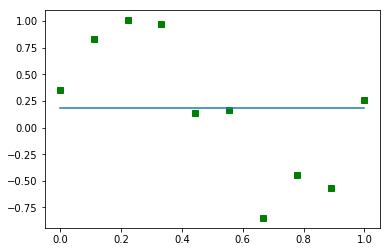

In [114]:
order = 0
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
opt = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.05)
plot_data(opt, X, phi, y, order)

#### M=1

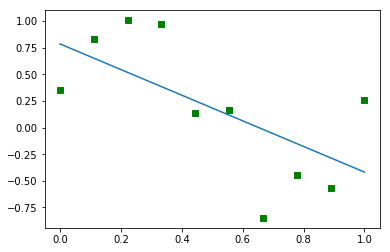

In [120]:
order = 1
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
opt = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.007)
plot_data(opt, X, phi, y, order)

#### M=3

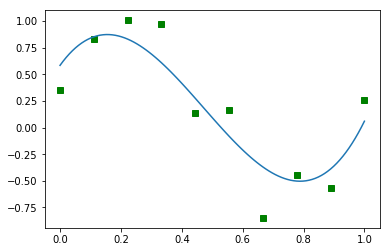

In [125]:
order = 3
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
opt = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.062)
plot_data(opt, X, phi, y, order)

##### M=9

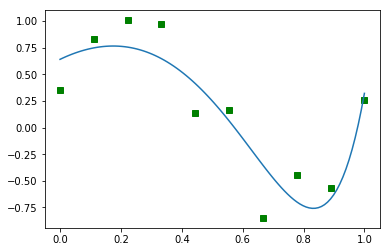

In [138]:
order = 9
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
opt = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.042)
plot_data(opt, X, phi, y, order)

#### Describe your experience with initial guesses, step sizes and convergence thresholds.

**Initial guess:** 
My initial guess for the weight vector (theta) is a random generator. It does not matter what the initial guess is becuase the gradient descent will converge with any value of the initial guess. 


**Step size:**
The graphs below describe my estimates for step count for each value of order

**Convergence criteria:**
The convergence criteria is left as the default value of 0.0001

#### M=0

Parameter setting for M=0 bishop curve function


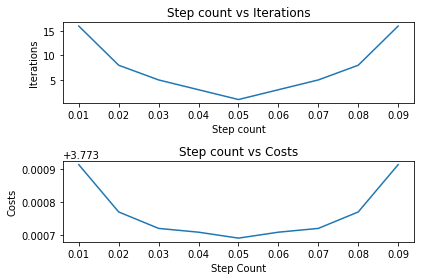

In [142]:
order = 0
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)

alpha_lst = list(np.arange(0.0, 1.8, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception as e:
        alpha_lst.remove(alpha)

print('Parameter setting for M=0 bishop curve function')

ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
# plt.yscale('log')
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count')

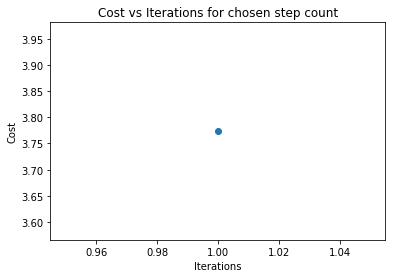

In [143]:
order = 0
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.05, debug=True)
# print(iters, cost, w)
plt.plot(iters, cost, 'o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count')

#### M=1

Parameter setting for M=1 bishop curve function


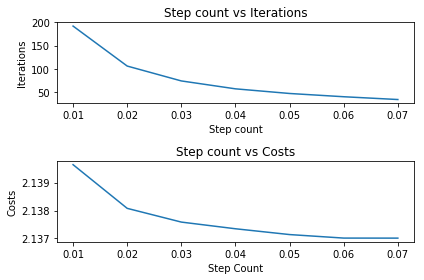

In [144]:
order = 1
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)

alpha_lst = list(np.arange(0.0, 1.8, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception as e:
        alpha_lst.remove(alpha)

print('Parameter setting for M=1 bishop curve function')

ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
# plt.yscale('log')
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count')

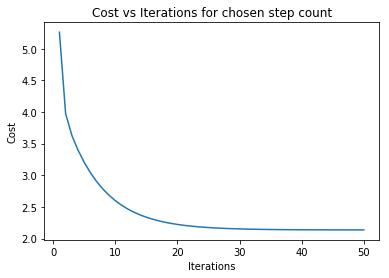

In [145]:
order = 1
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.05, debug=True)
plt.plot(iters, cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count')

#### M=3

Parameter setting for M=3 bishop curve function


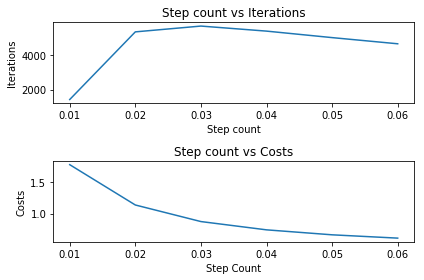

In [146]:
order = 3
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)

alpha_lst = list(np.arange(0.0, 3, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception as e:
        alpha_lst.remove(alpha)

print('Parameter setting for M=3 bishop curve function')

ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
# plt.yscale('log')
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count')

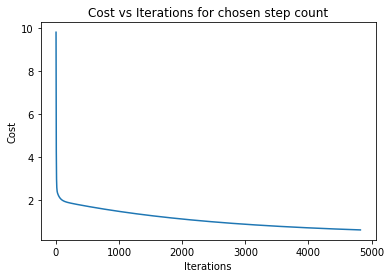

In [147]:
order = 3
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.06, debug=True)
plt.plot(iters, cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count')

#### M=9

Parameter setting for M=9 bishop curve function


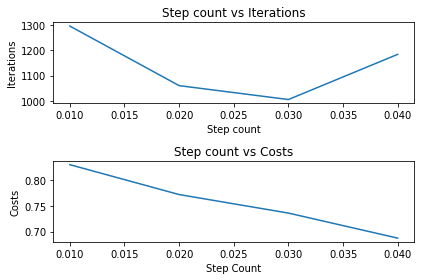

In [148]:
order = 9
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)

alpha_lst = list(np.arange(0.0, 3, 0.01))
iterations = list()
costs = list()
for alpha in copy(alpha_lst):
    iters = -1
    cost = -1
    try:
        iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=alpha, debug=True)
        iterations.append(iters[-1])
        costs.append(cost[-1])
    except Exception as e:
        alpha_lst.remove(alpha)

print('Parameter setting for M=9 bishop curve function')

ax1 = plt.subplot(211)
plt.plot(alpha_lst, iterations)
plt.xlabel('Step count')
plt.ylabel('Iterations')
plt.title('Step count vs Iterations')

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(alpha_lst, costs)
# plt.yscale('log')
plt.xlabel('Step Count')
plt.ylabel('Costs')
plt.title('Step count vs Costs')

plt.tight_layout()

Text(0.5,1,'Cost vs Iterations for chosen step count')

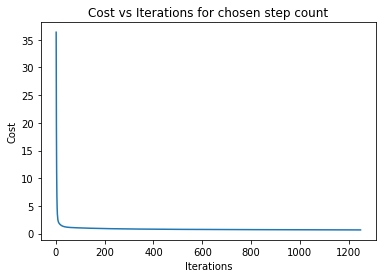

In [149]:
order = 9
X, y = bishopCurveData()
phi = designMatrix(X, order)
initial_theta = np.random.rand(phi.shape[1], 1)
iters, cost, w = optimize(sse, sse_grad, initial_theta, phi, y, alpha=0.042, debug=True)
plt.plot(iters, cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations for chosen step count')

## 3 Ridge Regression
#### 3.1 Implement ridge regression both analytically and via gradient descent

In [35]:
def ridge_normal_eq(X, y, penalty=0.05):
    return pinv(penalty*np.identity(X.shape[1])+X.T.dot(X)).dot(X.T).dot(y)

def ridge_grad(theta, X, y, penalty=0.00005):
    return sse_grad(theta, X, y) + penalty*theta

#### Experiment with different values of λ on the simple data from Appendix Figure 1, for various values of M. Describe your observations.

In [36]:
def test_lambda(costfunc, X, y, X_val=None, y_val=None):
    ''' method to plot the multipls lambdas against the cost of choosing it'''
    costs = []
    validation_costs = []
    penalties = list(np.arange(0.0, 10.0, 0.001))
    for penalty in penalties:        
        theta = ridge_normal_eq(X, y, penalty=penalty)
        costs.append(costfunc(theta, X, y))
        if X_val is not None:
            validation_costs.append(costfunc(theta, X_val, y_val))
    if X_val is None:
        return penalties, costs
    else:
        return penalties, costs, validation_costs

def _order_plot(order):
    phi = designMatrix(X, order)
    penalties, costs = test_lambda(sse, phi, y)
    plt.plot(penalties, costs)
#     plt.yscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    plt.title('Lambda vs Cost')

Below are the various plots of increasing values of lambda against multiple order values.

##### M = 0
We can see that for M=0, the cost (y-axis) begins from approx 3.6 which seems correct as the hypothesis grosly underfits the data. The cost keeps on increasing as we increase lambda which also makes sense as increasing lambda regularizes the weights which increases the underfitting. 

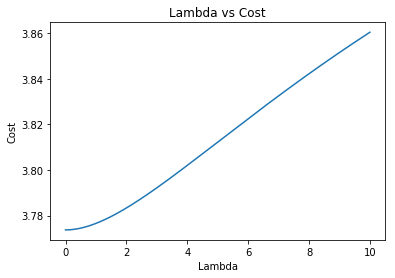

In [37]:
X, y = bishopCurveData()
_order_plot(0)

##### M=1
M=1 is similar to order 0, where the hypothesis is underfitting the training data. It's lesser than M=0, but it's still large enough to not give us any good predictions. And again, as we saw in M=0, increasing lambda increases the cost. 

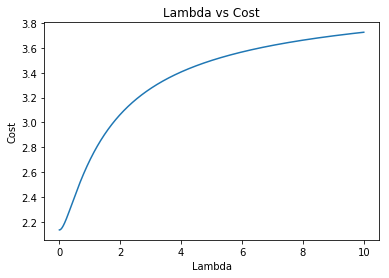

In [38]:
_order_plot(1)

##### M=3
Here, we know that the hypothesis with M=3 fits the training data well which is also shown in the plot below. The cost is not 0 (which would indicate overfitting) but is low enough for us to label it as a good fit to the training data.  

Looking at the graph, when Lambda is 0, the cost is minimum (not 0). This makes sense, because regularization is useful in cases when we overfit data, but M=3 is not overfitting the data, and hence increasing the lambda increases the cost (i.e. underfits the data). 

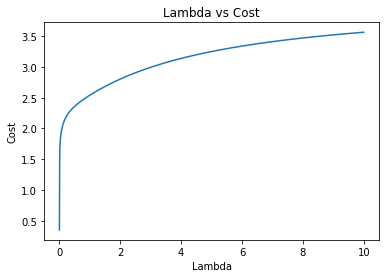

In [39]:
_order_plot(3)

##### M=9
Lastly, for M=9, we see that the cost is 0 for 0 lambda. This is usually an indication that the model has overfit the data. Now the cost also increases as we increase lambda; this makes sense because as we regularize the parameters, we are moving away from a perfict fit on the training data. This results in increasing the costs. 

If we study the graph more closely, the curve flattens as we reach a value of approx 3.8. This is also displayed on all the 3 graphs above, for M=3, M=1 and M=0. This means, that by increasing the lambda, we are forcing it to a straight line whose cost on the training data is approx 3.8. 

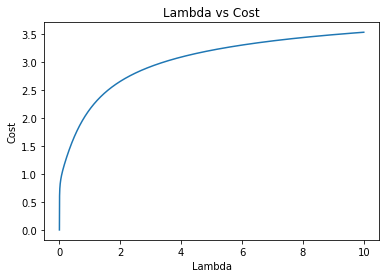

In [40]:
_order_plot(9)

#### 3.2 We have given you three additional data sets: there are two training data sets and one validation set. In general, we want to use the training data to optimize parameters and then use the performance of those parameters on the validation data to choose among models (e.g. values of M and values of λ), this is called “model selection”. Show some values of M and λ, and show the effect on the fit in the test and validation data. Which values work best for each of the training data sets? Explain.

In [41]:
def test_order(costfunc, X, y, X_val, y_val):
    costs = []
    orders = list(range(9))
    validation_costs = list()    
    for order in orders:
        phi = designMatrix(X, order)
        phi_val = designMatrix(X_val, order)
        theta = lin_normal_eq(phi, y)
        validation_costs.append(costfunc(theta, phi_val, y_val))
        costs.append(costfunc(theta, phi, y))
    return orders, costs, validation_costs

In [42]:
Xa, ya = regressAData()
Xb, yb = regressBData()
Xc, yc = validateData()

Text(0.5,1,'Order vs Cost for Data-Set-A (Red) and Validation-Set (Blue)')

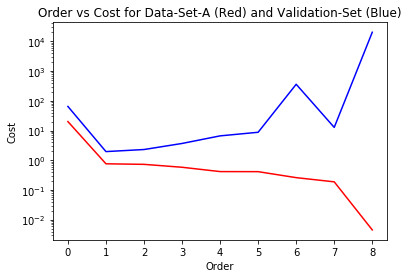

In [43]:
orders, costs_a, validation_costs_a = test_order(sse, Xa, ya, Xc, yc)
plt.plot(orders, costs_a, 'r')
plt.plot(orders, validation_costs_a, 'b')
plt.yscale('log')
plt.xlabel('Order')
plt.ylabel('Cost')
plt.title('Order vs Cost for Data-Set-A (Red) and Validation-Set (Blue)')

Here, we've plotted a graph of Oder vs Cost for data set A (red) and validation set (blue). We can see that the model that fits the validation set best is when order=1. 

Text(0.5,1,'Order vs Cost for Data-Set-B (Green) and Validation-Set (Blue)')

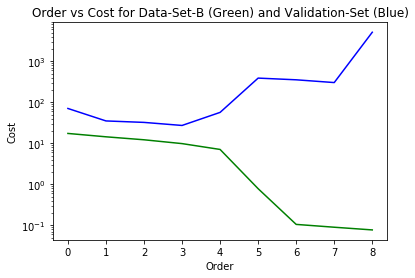

In [44]:
orders, costs_b, validation_costs_b = test_order(sse, Xb, yb, Xc, yc)
plt.plot(orders, costs_b, 'g')
plt.plot(orders, validation_costs_b, 'b')
plt.yscale('log')
plt.xlabel('Order')
plt.ylabel('Cost')
plt.title('Order vs Cost for Data-Set-B (Green) and Validation-Set (Blue)')

Here, we've plotted a graph of Oder vs Cost for data set B (green) and validation set (blue). We can see that the model that fits the validation set best is when order=3. 

In [45]:
Xa, ya = regressAData()
Xb, yb = regressBData()
Xc, yc = validateData()

Having learned from the above graphs, we now set the order to 1 for data A and that to 3 for data B. 

Text(0.5,1,'Lambda vs Cost for Data-Set-A (Red) and Validation-Set (Blue)')

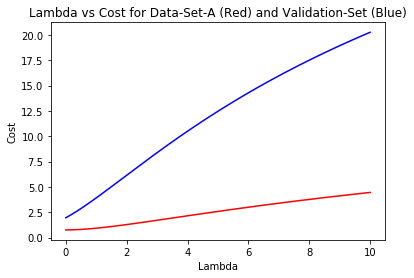

In [63]:
order = 1
phia = designMatrix(Xa, order)
phic = designMatrix(Xc, order)

penalties, costs_a, validation_costs_a = test_lambda(sse, phia, ya, phic, yc)
plt.plot(penalties, costs_a, 'r')
plt.plot(penalties, validation_costs_a, 'b')
# plt.yscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.title('Lambda vs Cost for Data-Set-A (Red) and Validation-Set (Blue)')

Here, we've plotted a graph of Lambda vs Cost for data set A (red) and validation set (blue), keepin order 1. 
We can see that the model that fits the validation set best is when lambda = 0. 

Text(0.5,1,'Lambda vs Cost for Data-Set-B (Green) and Validation-Set (Blue)')

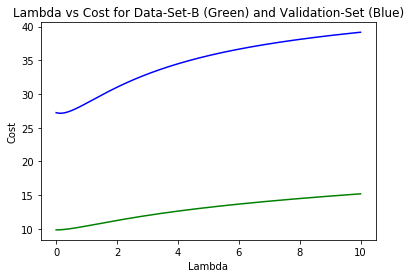

In [64]:
order = 3
phib = designMatrix(Xb, order)
phi_bc = designMatrix(Xc, order)

penalties, costs_b, validation_costs_a = test_lambda(sse, phib, yb, phi_bc, yc)
plt.plot(penalties, costs_b, 'g')
plt.plot(penalties, validation_costs_a, 'b')
# plt.yscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cost')
plt.title('Lambda vs Cost for Data-Set-B (Green) and Validation-Set (Blue)')

Here, we've plotted a graph of Lambda vs Cost for data set B (green) and validation set (blue), keepin order 3. 
We can see that the model that fits the validation set best is when lambda = 0. 

We know use the best selected parameters for data A and see how the plot is looks for data A and validation set

Text(0.5,1,'Selected model from data A on data A')

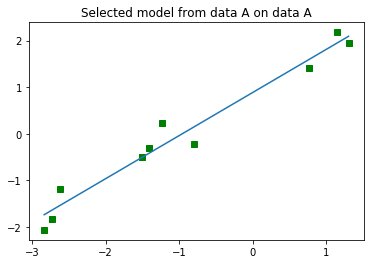

In [76]:
order = 1
phia = designMatrix(Xa, order)
phic = designMatrix(Xc, order)
opta = ridge_normal_eq(phia, ya, penalty=0)
optv_a = ridge_normal_eq(phic, yc, penalty=0)
plot_data(opta, Xa, phia, ya, order)
plt.title('Selected model from data A on data A')

Text(0.5,1,'Selected model from data A on validation set')

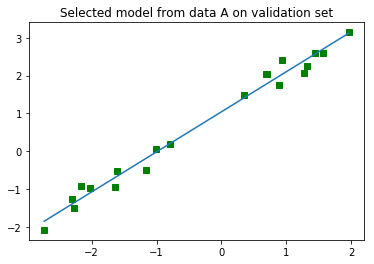

In [77]:
order = 1
phia = designMatrix(Xa, order)
phic = designMatrix(Xc, order)
opta = ridge_normal_eq(phia, ya, penalty=0)
optv_a = ridge_normal_eq(phic, yc, penalty=0)
plot_data(optv_a, Xc, phic, yc, order)
plt.title('Selected model from data A on validation set')

Text(0.5,1,'Selected model from data B on data B')

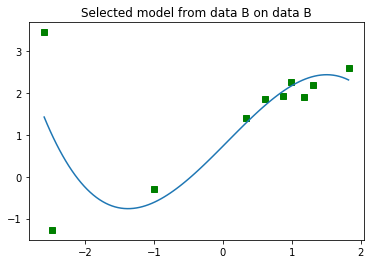

In [78]:
order = 3
phib = designMatrix(Xb, order)
phi_bc = designMatrix(Xc, order)
optb = ridge_normal_eq(phib, yb, penalty=0)
optv_b = ridge_normal_eq(phi_bc, yc, penalty=0)
plot_data(optb, Xb, phib, yb, order)
plt.title('Selected model from data B on data B')

Text(0.5,1,'Selected model from data B on validation set')

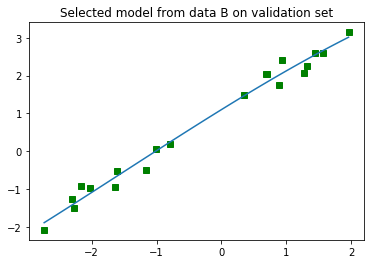

In [79]:
order = 3
phib = designMatrix(Xb, order)
phi_bc = designMatrix(Xc, order)
optb = ridge_normal_eq(phib, yb, penalty=0)
optv_b = ridge_normal_eq(phi_bc, yc, penalty=0)
plot_data(optv_b, Xc, phic, yc, order)
plt.title('Selected model from data B on validation set')

** Looking at the last 4 plots, we can clearly see that our model selection worked well and fit really well on the validation set **